In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1: Load Two Data Sets and print them using df.head() separately.
df_1 = pd.read_csv('DF_1_FAOSTAT_data_en_11-19-2025.csv')
df_2 = pd.read_csv('DF_2_Crop_recommendation.csv')

print("--- Yield Dataset (DF_1) ---")
print(df_1.head())
print("\n--- Crop Recommendation Dataset (DF_2) ---")
print(df_2.head())

--- Yield Dataset (DF_1) ---
  Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element  Item Code (CPC)  \
0          5312  Area harvested           1654.0   
1          5412           Yield           1654.0   
2          5510      Production           1654.0   
3          5312  Area harvested           1654.0   
4          5412           Yield           1654.0   

                                                Item  Year Code  Year   Unit  \
0  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000     ha   
1  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000  

In [2]:
# Task 2: Filter Yield Dataset for Area = India only, print it using df.head() and df.shape().
df_1_india = df_1[df_1['Area'] == 'India'].copy()

print("Filtered Dataset Head:")
print(df_1_india.head())
print("\nFiltered Dataset Shape:", df_1_india.shape)

Filtered Dataset Head:
  Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element  Item Code (CPC)  \
0          5312  Area harvested           1654.0   
1          5412           Yield           1654.0   
2          5510      Production           1654.0   
3          5312  Area harvested           1654.0   
4          5412           Yield           1654.0   

                                                Item  Year Code  Year   Unit  \
0  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000     ha   
1  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000  kg/ha 

In [3]:
# Task 3: Perform Explosion on Yield Dataset
print("Before Explosion Head:")
print(df_1_india.head())
print("Before Explosion Shape:", df_1_india.shape)

# Step 1: Split the comma-separated string into a list
df_1_india['Item_List'] = df_1_india['Item'].astype(str).str.split(',')

# Step 2: Explode the list into separate rows
df_1_exploded = df_1_india.explode('Item_List')

# Step 3: Clean up whitespace in the new item names
df_1_exploded['Item'] = df_1_exploded['Item_List'].str.strip()

print("\nAfter Explosion Head:")
print(df_1_exploded.head())
print("After Explosion Shape:", df_1_exploded.shape)

Before Explosion Head:
  Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element  Item Code (CPC)  \
0          5312  Area harvested           1654.0   
1          5412           Yield           1654.0   
2          5510      Production           1654.0   
3          5312  Area harvested           1654.0   
4          5412           Yield           1654.0   

                                                Item  Year Code  Year   Unit  \
0  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000     ha   
1  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000  kg/ha 

In [4]:
# Task 4: Merge two datasets using inner join (common column = Item/label)

# Create a common key (lowercase) for merging to match 'Rice' with 'rice'
df_1_exploded['merge_key'] = df_1_exploded['Item'].str.lower()
df_2['merge_key'] = df_2['label'].str.strip().str.lower()

# Perform Inner Join
merged_df = pd.merge(df_1_exploded, df_2, left_on='merge_key', right_on='merge_key', how='inner')

print("Merged Dataset Shape:", merged_df.shape)
print(merged_df.head())

Merged Dataset Shape: (28800, 25)
  Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element  Item Code (CPC)    Item  Year Code  Year  \
0          5312  Area harvested           1610.0  Coffee       2000  2000   
1          5312  Area harvested           1610.0  Coffee       2000  2000   
2          5312  Area harvested           1610.0  Coffee       2000  2000   
3          5312  Area harvested           1610.0  Coffee       2000  2000   
4          5312  Area harvested           1610.0  Coffee       2000  2000   

   ... Item_List  merge_key    N   P   K temperature   humidity        ph  \

In [5]:
# Task 5: Keep only specific columns and drop others
cols_to_keep = ['Element', 'Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

# Select only these columns (Using 'rainfall' from df_2 which is lowercase)
# Ensure we check if columns exist to avoid errors
available_cols = [c for c in cols_to_keep if c in merged_df.columns]
final_df = merged_df[available_cols].copy()

print("Final Dataset Shape:", final_df.shape)
print("Head:\n", final_df.head())
print("Tail:\n", final_df.tail())

Final Dataset Shape: (28800, 10)
Head:
           Element     Value    N   P   K  temperature   humidity        ph  \
0  Area harvested  308433.0   91  21  26    26.333780  57.364700  7.261314   
1  Area harvested  308433.0  107  21  26    26.452885  55.322227  7.235070   
2  Area harvested  308433.0   83  38  35    25.708227  52.886671  7.189156   
3  Area harvested  308433.0  108  24  31    24.128325  56.181077  6.431900   
4  Area harvested  308433.0  116  28  34    23.443723  60.395233  6.423211   

     rainfall   label  
0  191.654941  coffee  
1  144.686134  coffee  
2  136.732509  coffee  
3  147.275782  coffee  
4  122.210325  coffee  
Tail:
           Element        Value   N   P   K  temperature   humidity        ph  \
28795  Production  206727000.0  88  46  42    22.683191  83.463583  6.604993   
28796  Production  206727000.0  93  47  37    21.533463  82.140041  6.500343   
28797  Production  206727000.0  60  55  45    21.408658  83.329319  5.935745   
28798  Production  2

In [6]:
# Task 6: Keep only rows where Element is 'Production'
print("Unique Elements BEFORE filtering:", final_df['Element'].unique())

# Filter the dataset
final_df = final_df[final_df['Element'] == 'Production']

print("Unique Elements AFTER filtering:", final_df['Element'].unique())

Unique Elements BEFORE filtering: ['Area harvested' 'Yield' 'Production']
Unique Elements AFTER filtering: ['Production']


In [7]:
# Task 7: Remove / Drop Column 'Element'
final_df.drop(columns=['Element'], inplace=True)

print("Columns after dropping 'Element':", final_df.columns.tolist())

Columns after dropping 'Element': ['Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


Data Cleaned Successfully.
Original Shape: (9500, 9)
Clean Shape:    (6644, 9)


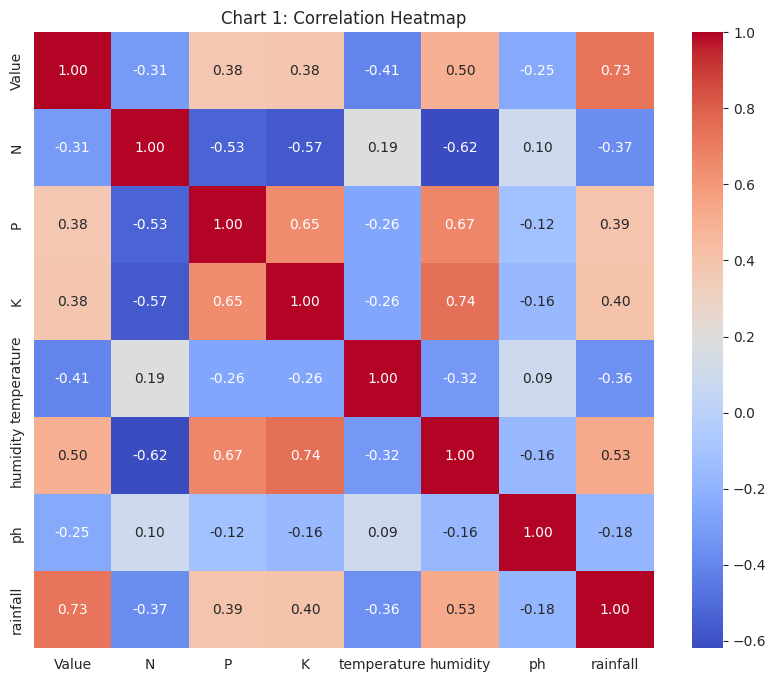

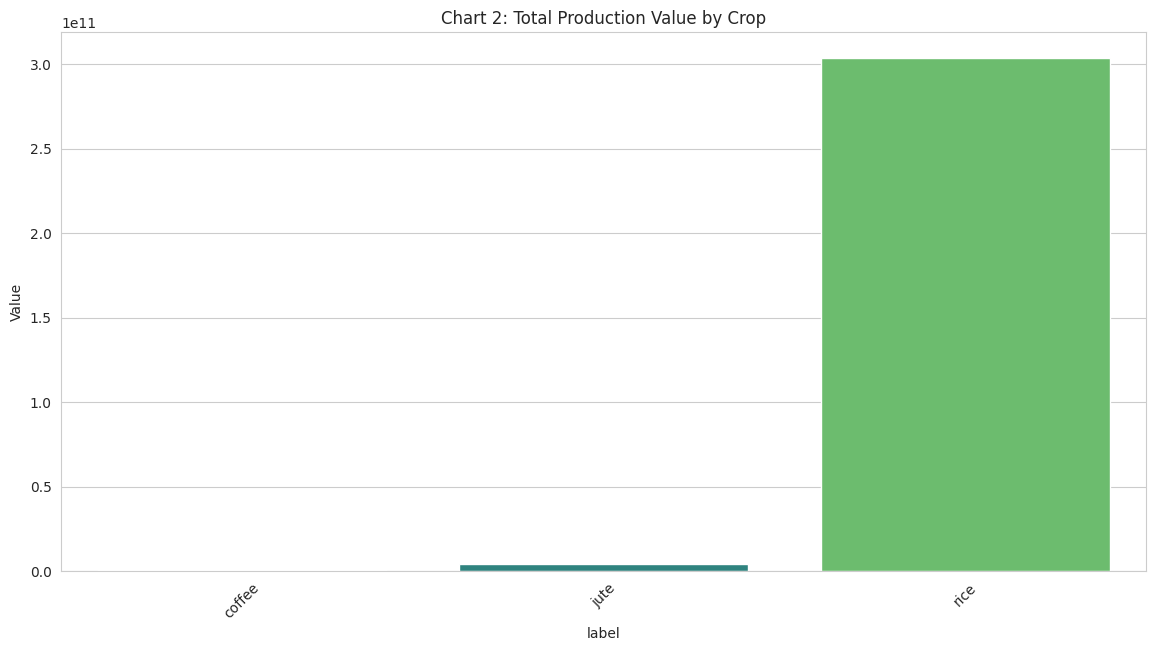

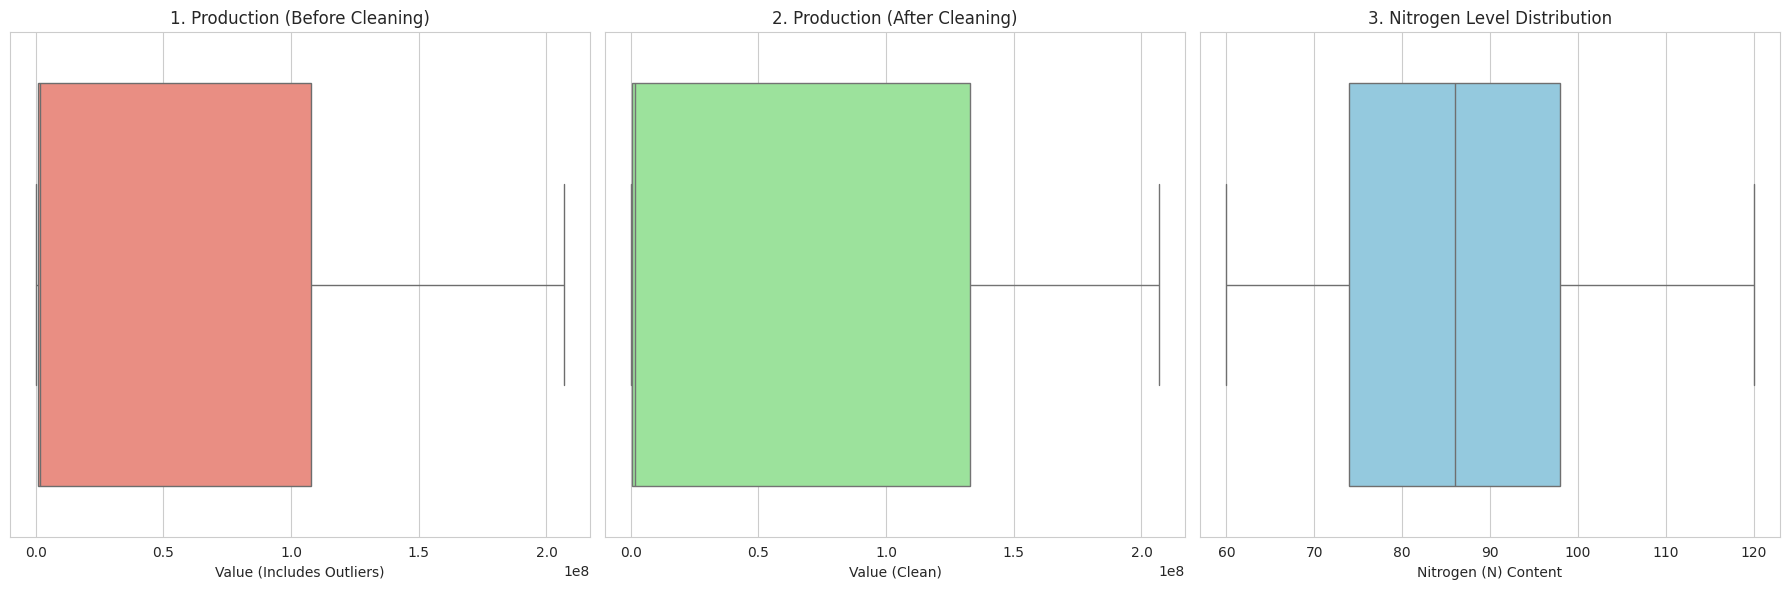

In [10]:
# Task 8: Complete EDA (Cleaning + Visualizations)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- PART 1: CLEANING ---
# 1. Drop Nulls
final_df.dropna(inplace=True)

# 2. Drop Duplicates
final_df.drop_duplicates(inplace=True)

# 3. Remove Outliers (IQR Method)
numeric_cols = ['Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# We keep 'final_df' as the "Dirty" version (with outliers) for comparison
final_df_clean = final_df.copy()

for col in numeric_cols:
    Q1 = final_df_clean[col].quantile(0.25)
    Q3 = final_df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    final_df_clean = final_df_clean[(final_df_clean[col] >= lower_bound) & (final_df_clean[col] <= upper_bound)]

print("Data Cleaned Successfully.")
print(f"Original Shape: {final_df.shape}")
print(f"Clean Shape:    {final_df_clean.shape}")

# --- PART 2: VISUALIZATIONS ---
sns.set_style("whitegrid")

# CHART 1: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(final_df_clean[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Chart 1: Correlation Heatmap")
plt.show()

# CHART 2: Bar Chart (Production Value)
plt.figure(figsize=(14, 7))
sns.barplot(x='label', y='Value', hue='label', data=final_df_clean, estimator=sum, errorbar=None, palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.title("Chart 2: Total Production Value by Crop")
plt.show()

# CHART 3, 4 & 5: Distribution Boxplots (Side-by-Side)
# We now plot 3 boxes to show the "Story" of the data
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: The Messy Data (Before Cleaning)
sns.boxplot(x=final_df['Value'], ax=axes[0], color='salmon')
axes[0].set_title('1. Production (Before Cleaning)', fontsize=12)
axes[0].set_xlabel('Value (Includes Outliers)')

# Plot 2: The Clean Data (After Cleaning)
sns.boxplot(x=final_df_clean['Value'], ax=axes[1], color='lightgreen')
axes[1].set_title('2. Production (After Cleaning)', fontsize=12)
axes[1].set_xlabel('Value (Clean)')

# Plot 3: Nitrogen Distribution (Shows Soil Health) -> NEW ADDITION
sns.boxplot(x=final_df_clean['N'], ax=axes[2], color='skyblue')
axes[2].set_title('3. Nitrogen Level Distribution', fontsize=12)
axes[2].set_xlabel('Nitrogen (N) Content')

plt.tight_layout()
plt.show()